In [1]:
import os
import pandas as pd
import numpy as np

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
data_path = '/workspaces/Classification/Data'

# Load CSV files
bureau_df = pd.read_csv(os.path.join(data_path,'bureau_data.csv'))
customers_df = pd.read_csv(os.path.join(data_path,'customers.csv'))
loan_df = pd.read_csv(os.path.join(data_path,'loans.csv'))

bureau_df.head()


,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [3]:
customers_df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [4]:
loan_df.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [5]:
print(f" Bureau Data Shape:    {bureau_df.shape}  # (rows, columns)")
print(f" Customers Data Shape: {customers_df.shape}  # (rows, columns)")
print(f" Loans Data Shape:     {loan_df.shape}  # (rows, columns)")

 Bureau Data Shape:    (50000, 8)  # (rows, columns)
 Customers Data Shape: (50000, 12)  # (rows, columns)
 Loans Data Shape:     (50000, 15)  # (rows, columns)


In [6]:
df = pd.merge(customers_df, loan_df, on= 'cust_id')

In [7]:
df = pd.merge(df, bureau_df)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [9]:
df['default'] = df['default'].astype(int)
df.default.value_counts()


default
0    45703
1     4297
Name: count, dtype: int64

In [10]:
X= df.drop("default",axis ='columns')
y = df['default']

In [11]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,      
    random_state=42,   
    stratify=y           
)
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape: ", X_test.shape)
print("Training label shape:      ", y_train.shape)
print("Testing label shape:       ", y_test.shape)

Training feature set shape: (37500, 32)
Testing feature set shape:  (12500, 32)
Training label shape:       (37500,)
Testing label shape:        (12500,)


In [12]:
df_train = pd.concat([X_train,y_train], axis = 'columns')
df_test = pd.concat([X_test,y_test], axis = 'columns')

df_train.shape, df_test.shape

((37500, 33), (12500, 33))

### Data Cleaning

Data cleaning is one of the most important steps in any machine learning pipeline.
In this section, we ensure that our data is accurate, consistent, and ready for analysis.

In [13]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [14]:
df_train.residence_type.value_counts()

residence_type
Owned       21133
Mortgage     8858
Rented       7462
Name: count, dtype: int64

In [15]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [16]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_train.residence_type.unique()

/tmp/ipykernel_15770/2089477585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [17]:
df_test.residence_type.fillna(mode_residence, inplace=True)

/tmp/ipykernel_15770/504530992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace=True)


In [18]:
df_train.duplicated().sum()

np.int64(0)

In [19]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [20]:
columns_continous = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical columns (object or category types)
columns_categorical = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [21]:
columns_continous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'default']

In [22]:
columns_categorical

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt']

## EDA START HERE
To get overview of outliers first of all we will plot box plots

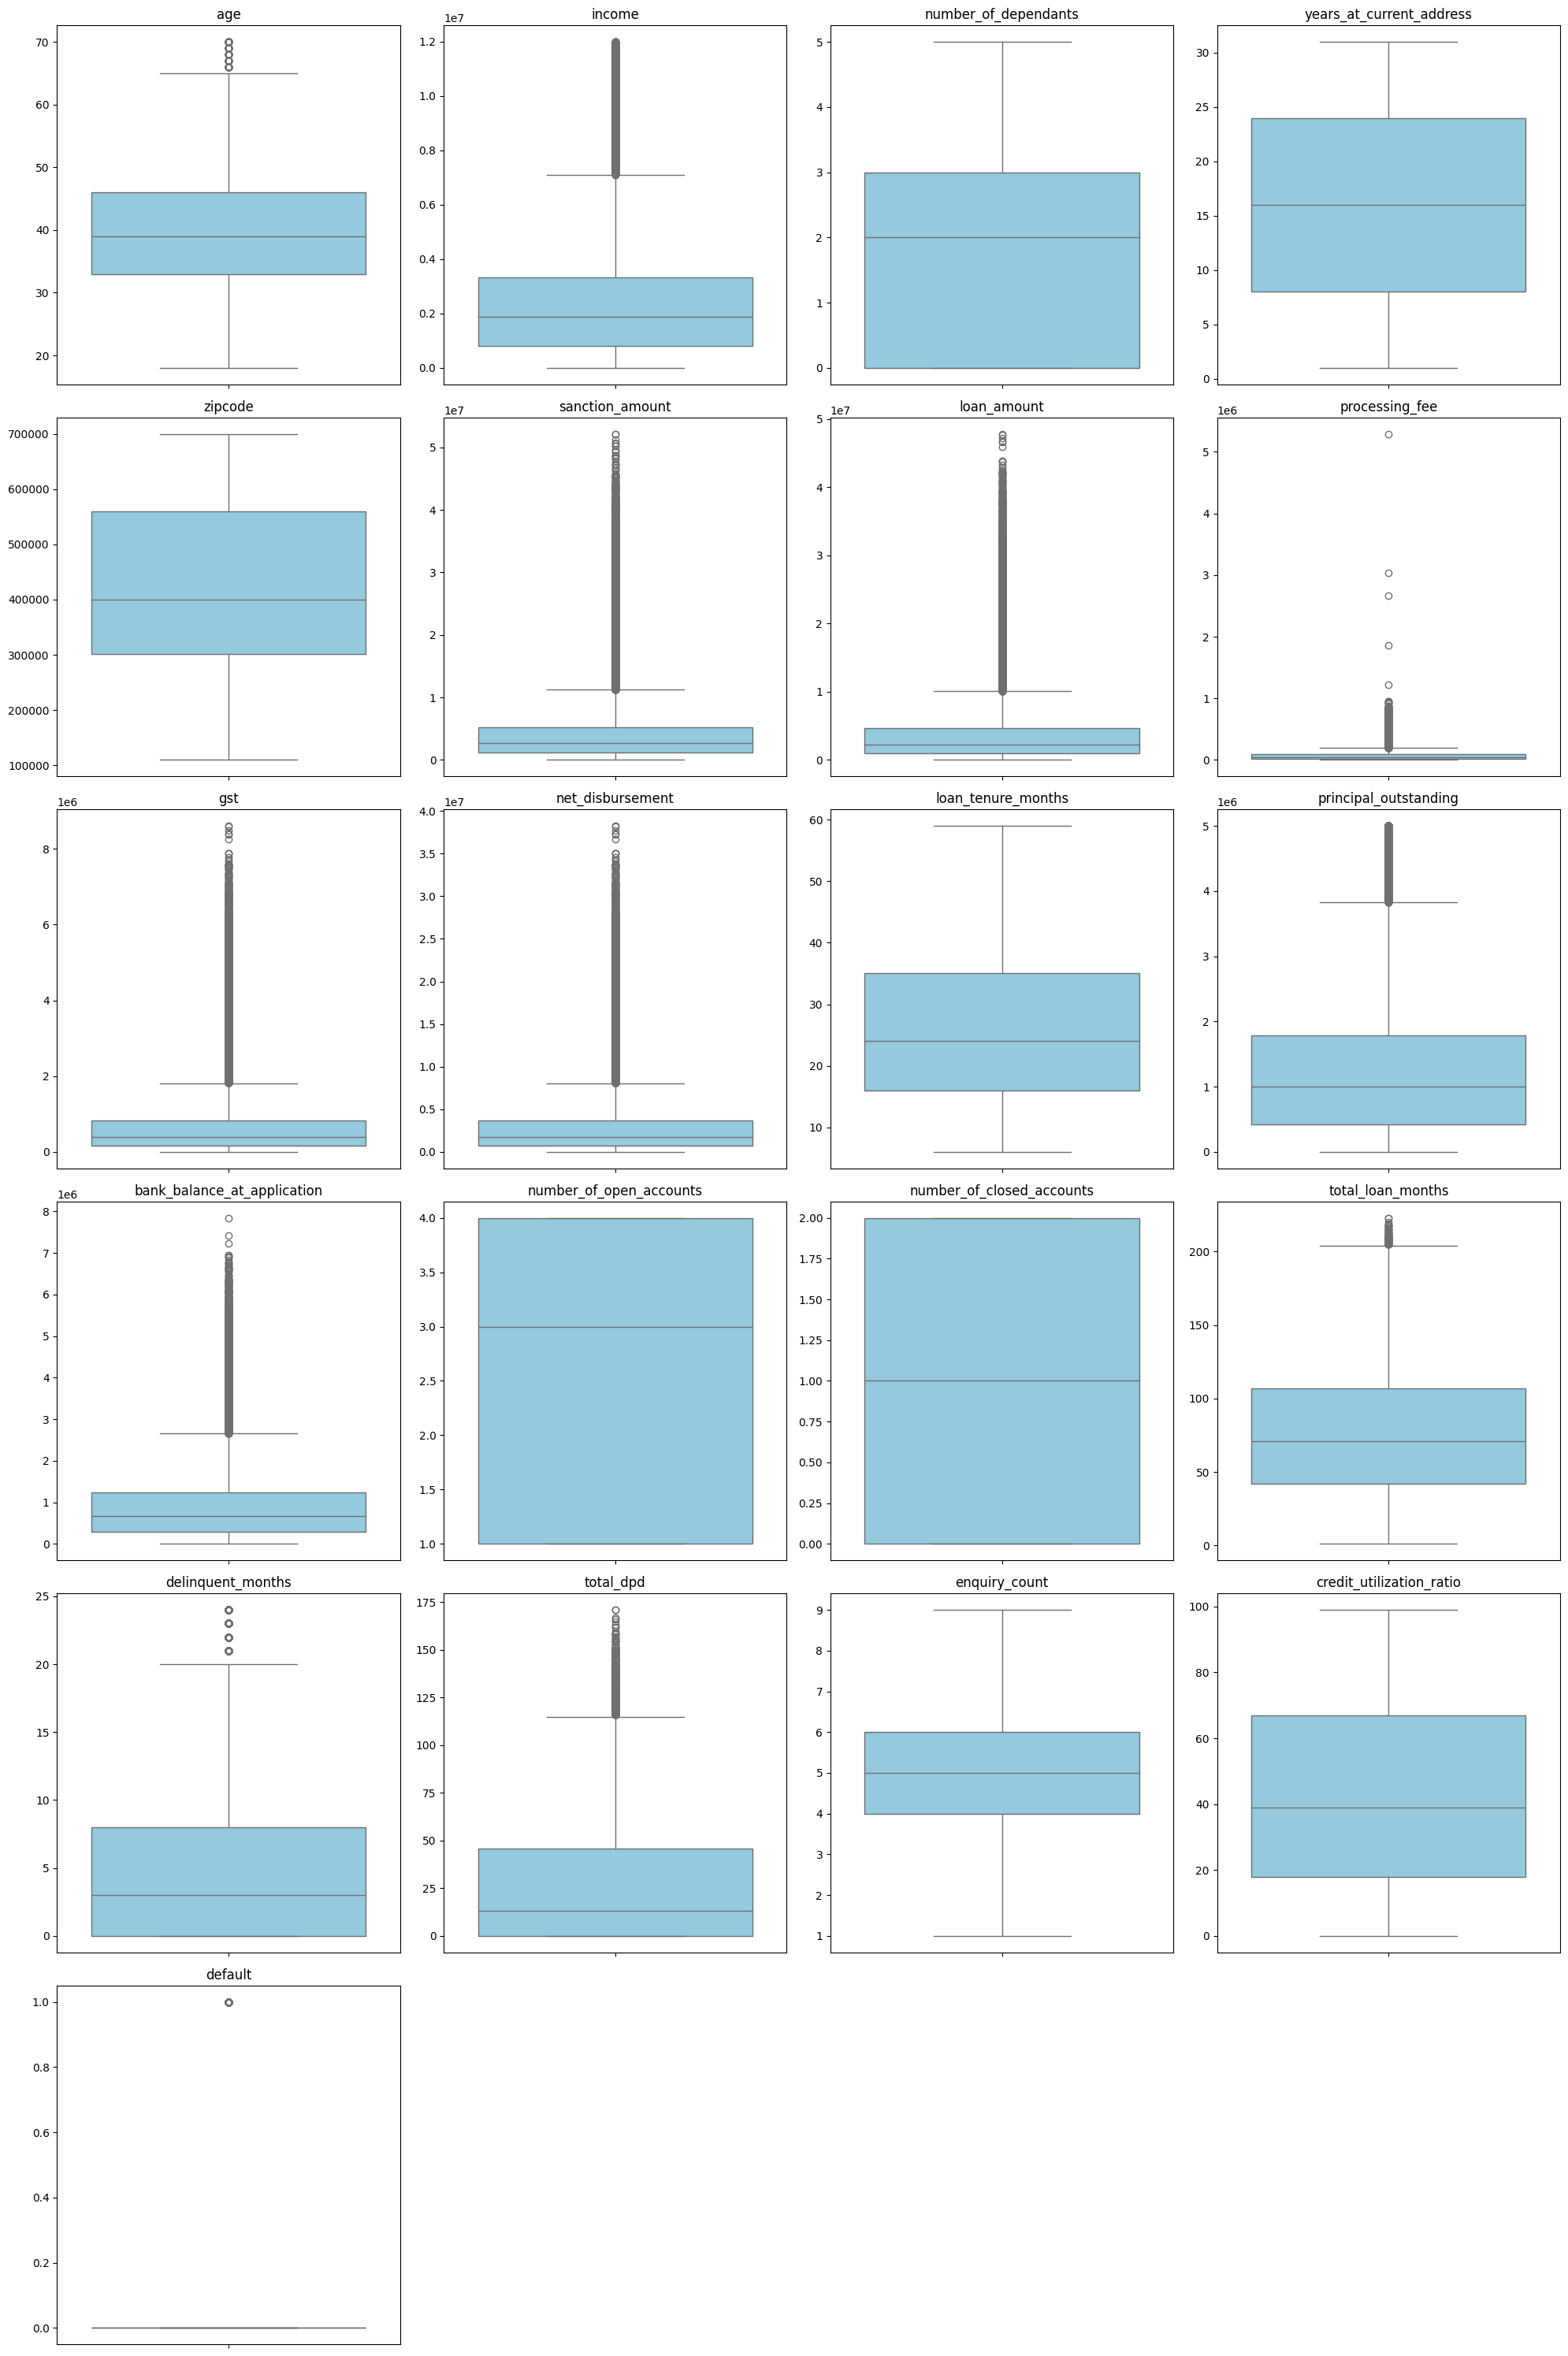

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Determine how many rows are needed (4 plots per row)
num_cols = len(columns_continous)
cols_per_row = 4
num_rows = math.ceil(num_cols / cols_per_row)

# Set the figure size dynamically based on number of rows
plt.figure(figsize=(20, 5 * num_rows))

# Create boxplots for each numeric column
for i, col in enumerate(columns_continous, 1):
    plt.subplot(num_rows, cols_per_row, i)
    sns.boxplot(data=df_train, y=col, color='skyblue')
    plt.title(col, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

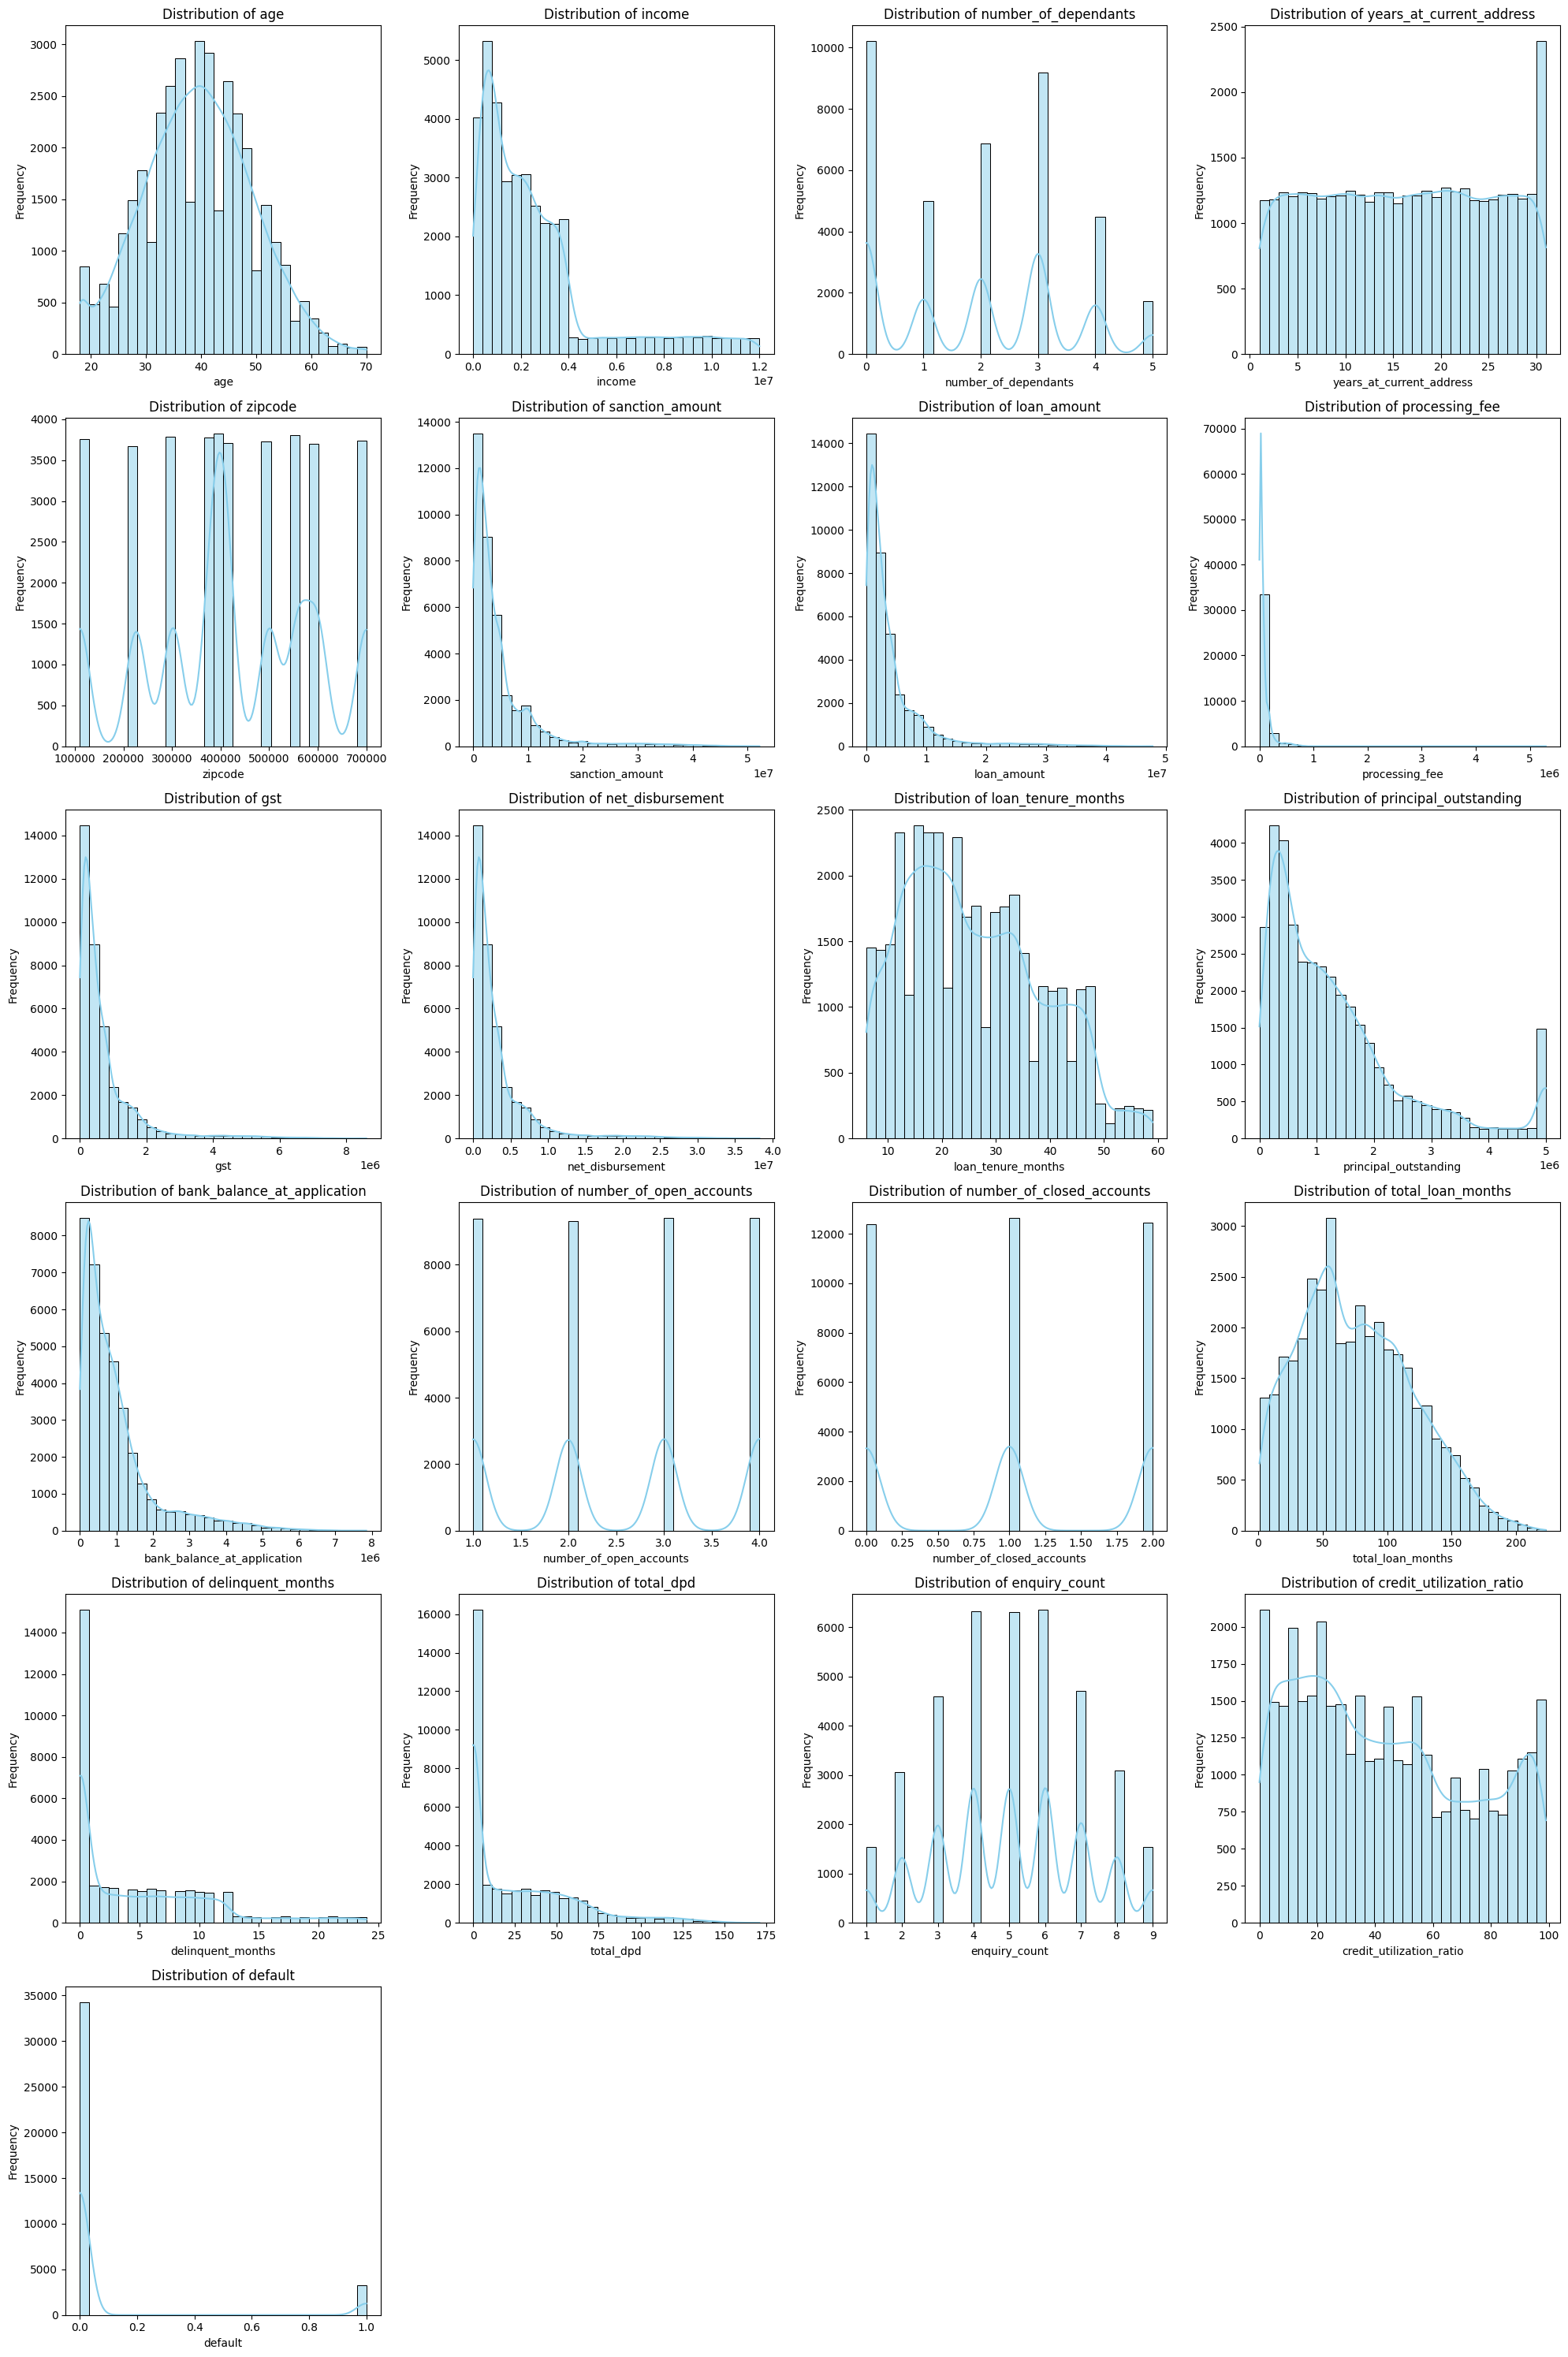

In [26]:
num_cols = len(columns_continous)
cols_per_row = 4
num_rows = math.ceil(num_cols / cols_per_row)

# Set figure size dynamically
plt.figure(figsize=(20, 5 * num_rows))

# Plot each numeric column
for i, col in enumerate(columns_continous, 1):
    plt.subplot(num_rows, cols_per_row, i)
    sns.histplot(df_train[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()